In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv("../data/train.csv", index_col=0)

train_features = train.iloc[:, :5]
train_labels = train.iloc[:, 5].to_numpy()

train_features, test1_features, train_labels, test1_labels = train_test_split(
    train_features, train_labels, train_size=0.8, random_state=42)

test2 = pd.read_csv("../data/test.csv", index_col=0)
test2_features = test2.iloc[:, :5]
test2_labels = test2.iloc[:, 5].to_numpy()

display(train_features)

,fuv_mag,nuv_mag,Vmag,Bmag,err
44960,20.189,19.755,16.794,17.253,0.132189
25949,20.652,16.645,13.558,13.891,0.054589
10427,24.094,18.177,13.921,14.438,0.096317
1478,22.155,17.244,14.700,15.104,0.065115
25354,22.606,15.374,10.436,11.025,0.046861
...,...,...,...,...,...
11284,18.646,17.648,15.065,15.227,0.036770
44732,19.688,19.156,15.947,16.938,0.102591
38158,23.827,16.938,11.074,11.755,0.066287
860,22.642,16.870,12.931,13.382,0.216280


In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')

# Linear regression classifier
1. Ordinary least squares method

In [3]:
from regression import BinaryRegression

br = BinaryRegression()
br.fit(train_features, train_labels)

BinaryRegression()

there are 0 predicted values less than -0.1
there are 0 predicted values greater than 1


Text(0.5, 1.0, 'Distribution over the test dataset')

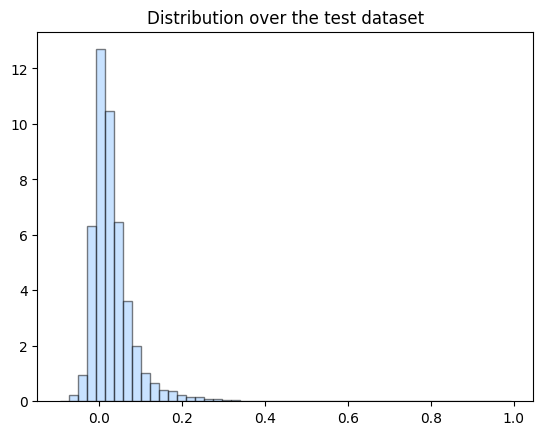

In [4]:
import numpy as np


reg_pred = br.predict(test2_features)

th1 = -0.1
print(
    f"there are {np.where(reg_pred < th1)[0].shape[0]} predicted values less than {th1}")

th2 = 1
print(
    f"there are {np.where(reg_pred > th2)[0].shape[0]} predicted values greater than {th2}", )

br.draw_dist(test2_features)
plt.title("Distribution over the test dataset")

## Choosing threshhold
We should choose threshold to turn continious data to binary one. Let's try two algrotihms for this task:
1. ROC Curve and Youden's Index
2. Precision-Recall Curve
3. Cost-based and brutforce

In [5]:
br.metric(test2_features, test2_labels, 0.5)
# because almost half are ones

Accuracy:  0.49815246985608713
Recall:    0.0002906695087685302
F1:        0.0005809450038729666
[[10243     4]
 [10318     3]]


### ROC Curve 
ROC Curve (True positive, false positive)\
AUC is area under ROC curve, it's great to compare models by AUC if dataset is balanced, not our case.\
Youden’s Index= TPR−FPR\
So the task is to minimize Youden's index.\

Youden's index is minimized when the distance from point on the curve to (0, 1) is minimal.

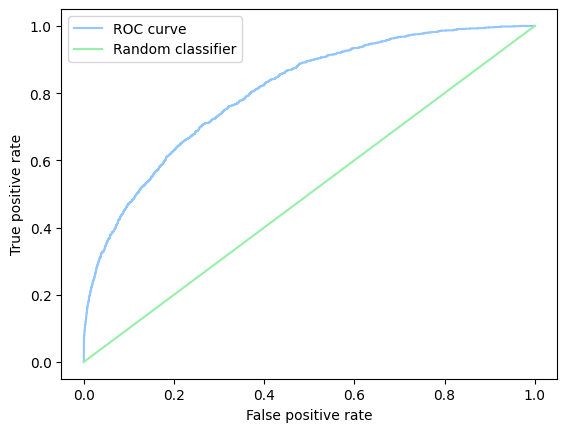

In [6]:
from sklearn.metrics import roc_curve

# Example: y_true = true labels, y_pred_proba = predicted probabilities
reg_pred = br.predict(train_features)
fpr, tpr, thresholds = roc_curve(train_labels, reg_pred)

plt.plot(fpr, tpr, label="ROC curve")

x = np.linspace(0, 1, fpr.shape[0])
plt.plot(x, x, label="Random classifier")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

youden_index = tpr - fpr  # argument to maximize

threshold_youden = thresholds[np.argmax(youden_index)]

In [7]:
br.metric(test2_features, test2_labels, threshold_youden)
print()
# on part of train dataset
br.metric(test1_features, test1_labels, threshold_youden)

Accuracy:  0.5060287825748736
Recall:    0.28679391531828313
F1:        0.3681592039800995
[[7448 2799]
 [7361 2960]]

Accuracy:  0.736820170868931
Recall:    0.734006734006734
F1:        0.14719783929777178
[[6854 2447]
 [  79  218]]


### Precision and recall curve
$Precision = \frac{TP}{TP+FP} $
\
\
$Recall = \frac{TP}{TP+FN}$

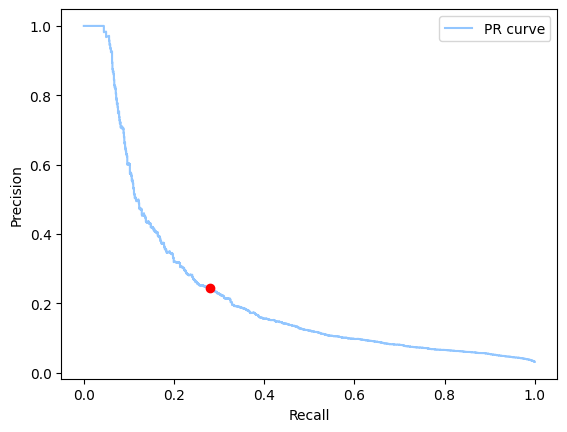

In [8]:
from sklearn.metrics import precision_recall_curve

reg_pred = br.predict(train_features)
precision, recall, thresholds = precision_recall_curve(train_labels, reg_pred)

f1_scores = 2 * (precision * recall) / (precision + recall)  # optimizing f1
best_index = np.argmax(f1_scores)
threshold_f1 = thresholds[best_index]

plt.plot(recall, precision, label="PR curve")
plt.plot(recall[best_index], precision[best_index], "ro")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

In [9]:
br.metric(test2_features, test2_labels, threshold_f1)
print()
# on part of train dataset
br.metric(test1_features, test1_labels, threshold_f1)

Accuracy:  0.4987359004278491
Recall:    0.03749636663114039
F1:        0.06983038614218694
[[9871  376]
 [9934  387]]

Accuracy:  0.9474890602208793
Recall:    0.26936026936026936
F1:        0.24096385542168675
[[9014  287]
 [ 217   80]]


### Cost threshold


In [10]:
youden_cost = br.cost_threshold(train_features, train_labels)
br.metric(test2_features, test2_labels, youden_cost)
print()
# on part of train dataset
br.metric(test1_features, test1_labels, youden_cost)

Accuracy:  0.5017502917152858
Recall:    0.9999031101637438
F1:        0.6682206682206682
[[    0 10247]
 [    1 10320]]

Accuracy:  0.03094394665555324
Recall:    1.0
F1:        0.06003031834259727
[[   0 9301]
 [   0  297]]


Regression is very bad for classification, accuracy is if it was the random classifier

# Isolation forest

# 